W20231107 19:26:32.067457 21623 face_landmarker_graph.cc:168] Face blendshape model contains CPU only ops. Sets FaceBlendshapesGraph acceleration to Xnnpack.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


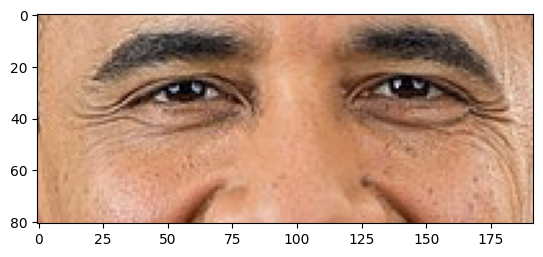

In [1]:
import matplotlib.pyplot as plt
from FaceLandmark import faceLandmark
fl = faceLandmark()
img_file = "../demo_image.png"
fl.detect_landmarks(img_file)
cropped_image_rgb = fl.get_part_of_face("eye")[0]
plt.imshow(cropped_image_rgb)

In [ ]:
import os
import matplotlib.pyplot as plt
from FaceLandmark import faceLandmark
import cv2

image_dir = "dataset/"
face_parts = ["eye", "frontal", "lips", "leftcheeks", "rightcheeks", "nose"]

for part in face_parts:
    os.makedirs(part, exist_ok=True)

for root, dirs, files in os.walk(image_dir):
    for file in files:
        try:
            fl = faceLandmark()
            img_file = os.path.join(root, file)
            fl.detect_landmarks(img_file)
            for part in face_parts:
                cropped_images = fl.get_part_of_face(part) 
                save_path = os.path.join(part, f"{os.path.splitext(file)[0]}_{part}_{i}.png")
                cv2.imwrite(save_path, cv2.cvtColor(cropped_images, cv2.COLOR_RGB2BGR))
        except Exception as e:
            print(e)